## 1. Dataset Schema Analysis

We will use the following UCI dataset for this lesson and the related exercise.

**Dataset**: Heart Disease Dataset donated to UCI ML Dataset Repository https://archive.ics.uci.edu/ml/datasets/heart+Disease. The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

**Modeling Objective:** Predict the incidence of heart disease

Below is a list of areas that we will be looking for in our exploratory data analysis.
- Value Distributions - Is the dataset feature uniform, normal, skewed and severely unbalanced?
- Scale of Numerical Features
- Missing Values
- High Cardinality


**Dataset Schema**: The schema for the dataset that we will be using is on the page https://archive.ics.uci.edu/ml/datasets/heart+Disease  under the **"Attribute Information"** header. Please note that only 14 attributes are used and listed below
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:  3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing
    * Values >1: linking to attributes 59 through 68, which are vessels (we won't focus on this for this course)


### OPTIONAL- Use Tensorflow Data Validation (TFDV) for EDA

You are free to use your tool of choice to explore the data and create an EDA report at the end and TFDV currently has some bugs with the latest version of Chrome. The intention of this lesson is to expose you to TFDV as an option to explore your data. While there are other tools for exploratory data analysis, below are some reasons that TFDV can be helpful:
* Interactive and simple descriptive statistics visualization tool  
* Scales to large datasets
    * It uses "Apache Beam's data-parallel processing framework to scale the computation of statistics over large datasets."  
* Can be used to detect anomalies and drift with new data or differences between training and testing splits

Before building a machine learning model, we must first analyze the dataset and assess for common issues that may require preprocessing. We will use the TFDV library to help analyze and visualize the dataset. Some of the information has been adapted from the TFDV page(https://www.tensorflow.org/tfx/guide/tfdv). 

**IMPORTANT** You must use the Chrome browser to see the TFDV library visualizations.

NOTE: Please note that there are other ways we can explore and analyze the data but we will focus on these areas for the course.


### ETL 

In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**NOTE:** For this lesson and exercise we will use the processed not the raw dataset provided, so the categorical feature values have already been converted to numerical values.

For this exercise we will use the processed Cleveland Clinic dataset.

In [5]:
#https://archive.ics.uci.edu/ml/datasets/heart+Disease, Cleveland dataset
processed_cleveland_path = "./data/processed.cleveland.txt"
column_header_list = [
    'age',
   'sex',
   'cp',
   'trestbps',
     'chol',
      'fbs',
      'restecg',
      'thalach',
       'exang',
      'oldpeak',
       'slope',
       'ca',
        'thal', 
     'num_label'
]
processed_cleveland_df = pd.read_csv(processed_cleveland_path, names=column_header_list)

In [6]:
processed_cleveland_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Analyze Value Distributions

In [7]:
# visualize categorical distributions
def visualize_distributions(df, c):
    df[c].value_counts().plot(kind='bar')
    plt.show()
    plt.close()

Distribution for sex feature


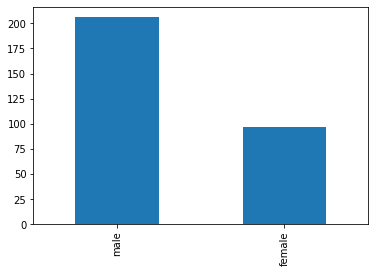

In [8]:
example_column1 = "sex"
print("Distribution for {} feature".format(example_column1))
processed_cleveland_df[example_column1].replace({1:"male", 0:"female"}).value_counts().plot(kind='bar')

Next, we will look at another categorical feature chest pain.

Distribution for cp feature


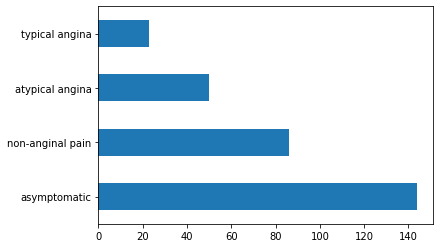

In [9]:
example_column2 = "cp"
print("Distribution for {} feature".format(example_column2))
processed_cleveland_df[example_column2].replace({1: "typical angina",
2: "atypical angina",
3: "non-anginal pain",
4: "asymptomatic" }).value_counts().plot(kind='barh')

### Review of normal and uniform distributions

**Normal Distribution**

In [10]:
mu, sigma = 100, 17.0 # mean and standard deviation
norm_dist = np.random.normal(mu, sigma, 100)

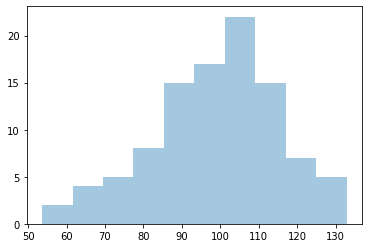

In [11]:
norm_ax = sns.distplot(norm_dist, kde=False )
plt.show()

**Uniform Distribution**

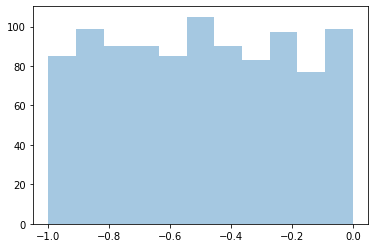

In [14]:
uniform_dist = np.random.uniform(-1,0,1000)
uniform_ax = sns.distplot(uniform_dist, kde=False )
plt.show()

**What type of distribution is this?**

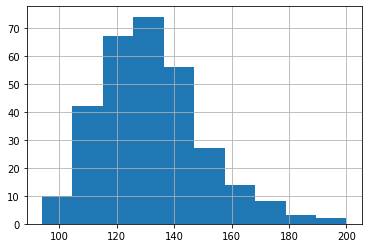

In [15]:
# numerical field histogram
processed_cleveland_df['trestbps'].hist()

## 3. Missing Values

### Scaling of numerical features 
- Compare min and max and see if scale is large 

In [16]:
numerical_feature_list = ['age',  'trestbps', 'chol', 'thalach', 'oldpeak' ]

In [17]:
processed_cleveland_df[numerical_feature_list].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [18]:
# Missing values
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                           'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df 

In [19]:
null_df = check_null_values(processed_cleveland_df)
null_df

,columns,percent_null,percent_zero
age,age,0.0,0.000000
sex,sex,0.0,32.013201
cp,cp,0.0,0.000000
trestbps,trestbps,0.0,0.000000
chol,chol,0.0,0.000000
fbs,fbs,0.0,85.148515
restecg,restecg,0.0,49.834983
thalach,thalach,0.0,0.000000
exang,exang,0.0,67.326733
oldpeak,oldpeak,0.0,32.673267


## 4. Outliers

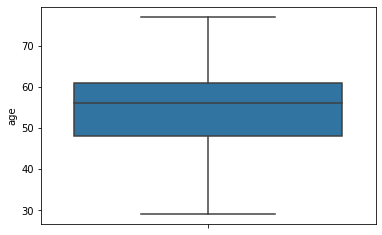

In [20]:
sns.boxplot(y=processed_cleveland_df['age'])

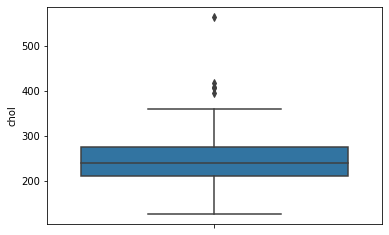

In [21]:
sns.boxplot(y=processed_cleveland_df['chol'])

## 5. High Cardinality

In [22]:
import numpy as np
def create_cardinality_feature(df):
    num_rows = len(df)
    random_code_list = np.arange(100, 1000, 1)
    return np.random.choice(random_code_list, num_rows)
    
def count_unique_values(df, cat_col_list):
    cat_df = df[cat_col_list]
    cat_df['principal_diagnosis_code'] = create_cardinality_feature(cat_df)
    #add feature with high cardinality
    val_df = pd.DataFrame({'columns': cat_df.columns, 
                       'cardinality': cat_df.nunique() } )
    return val_df

In [23]:
categorical_feature_list = [ 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [24]:
val_df = count_unique_values(processed_cleveland_df, categorical_feature_list) 
val_df

/Users/md/opt/anaconda3/envs/test_udacity_hc_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,columns,cardinality
sex,sex,2
cp,cp,4
restecg,restecg,3
exang,exang,2
slope,slope,3
ca,ca,5
thal,thal,4
principal_diagnosis_code,principal_diagnosis_code,260


# 6. Demographic Analysis

In [25]:
#convert age to bins
demo_features = ['sex',  'age' ]
demo_df = processed_cleveland_df[demo_features].replace({1:"male", 0:"female"})
age_bins = np.arange(0, 90, 10)
a_bin = [str(x) for x in np.arange(0, 90, 10) ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
demo_df['age_bins'] = pd.cut(demo_df['age'], bins=age_bins, labels=age_labels)

In [26]:
demo_df

,sex,age,age_bins
0,male,63.0,60 - 70
1,male,67.0,60 - 70
2,male,67.0,60 - 70
3,male,37.0,30 - 40
4,female,41.0,40 - 50
...,...,...,...
298,male,45.0,40 - 50
299,male,68.0,60 - 70
300,male,57.0,50 - 60
301,female,57.0,50 - 60


### Group by Age Bins

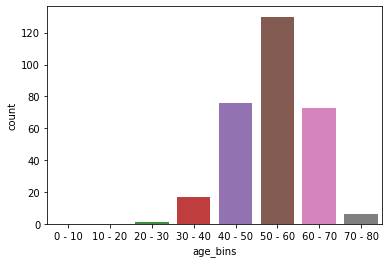

In [27]:
ax = sns.countplot(x="age_bins", data=demo_df)

### Group by Gender and Age Bins

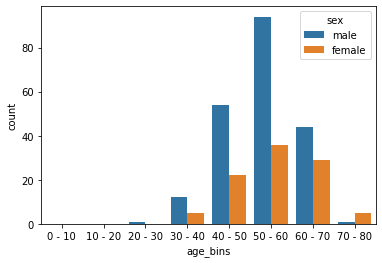

In [28]:
ax = sns.countplot(x="age_bins", hue="sex", data=demo_df)